# Title

Something about the assignment, group and members

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# datasets
df1 = pd.read_csv("co2_emissions_kt_by_country.csv")
df1["year"] = pd.to_numeric(df1["year"], errors="coerce").astype("Int64")
df1["value"] = pd.to_numeric(df1["value"], errors="coerce")

df2 = pd.read_csv("CurrentPopulationSurvey.csv")


## DataSet 1: CO2 Emissions

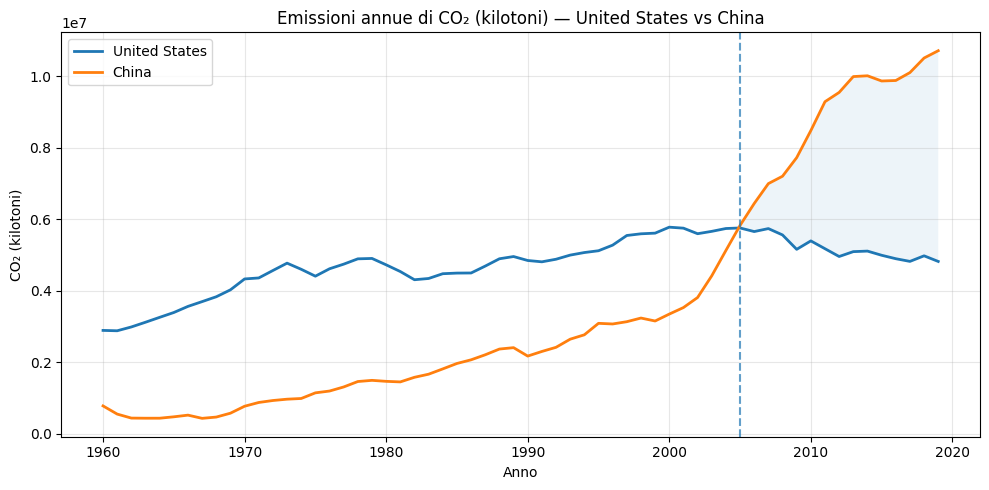

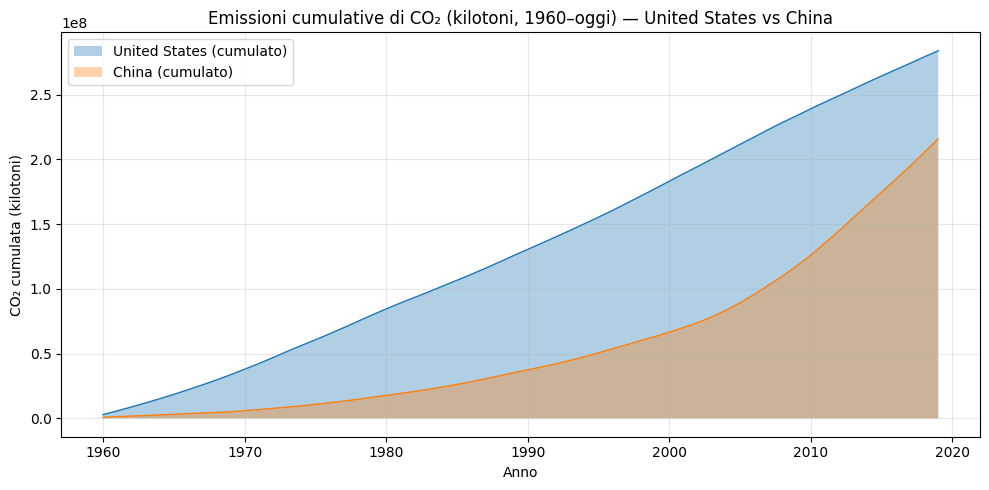

In [64]:
# Subset: USA vs Cina
pair = (df1[df1["country_name"].isin(["United States", "China"])]
          .dropna(subset=["year","value"])
          .astype({"year": int})
          .sort_values(["country_name","year"]))

wide = pair.pivot(index="year", columns="country_name", values="value").dropna(how="all")

# Trova primo anno in cui China > United States
valid = wide[["China","United States"]].dropna()
cross = valid.index[valid["China"] > valid["United States"]]
first_cross_year = int(cross.min()) if len(cross) else None

# --- 1) Emissioni annue (line) ---
plt.figure(figsize=(10,5))
plt.plot(wide.index, wide["United States"], linewidth=2, label="United States")
plt.plot(wide.index, wide["China"], linewidth=2, label="China")
if first_cross_year is not None:
    plt.axvline(first_cross_year, linestyle="--", alpha=0.7)
    plt.fill_between(wide.index,
                     np.nanmin(wide[["China","United States"]].values, axis=1),
                     np.nanmax(wide[["China","United States"]].values, axis=1),
                     where=(wide["China"] > wide["United States"]),
                     alpha=0.08)
plt.title("Emissioni annue di CO₂ (kilotoni) — United States vs China")
plt.xlabel("Anno"); plt.ylabel("CO₂ (kilotoni)"); plt.grid(True, alpha=0.3); plt.legend()
plt.tight_layout(); plt.savefig("annual_us_china.png", dpi=150)

# --- 2) Emissioni cumulative (area) ---
cum = wide.fillna(0).cumsum()
x = cum.index.values.astype(float)
y_us = cum["United States"].values.astype(float)
y_cn = cum["China"].values.astype(float)

plt.figure(figsize=(10,5))
plt.fill_between(x, y_us, alpha=0.35, label="United States (cumulato)")
plt.fill_between(x, y_cn, alpha=0.35, label="China (cumulato)")
plt.plot(x, y_us, linewidth=1); plt.plot(x, y_cn, linewidth=1)
plt.title("Emissioni cumulative di CO₂ (kilotoni, 1960–oggi) — United States vs China")
plt.xlabel("Anno"); plt.ylabel("CO₂ cumulata (kilotoni)"); plt.grid(True, alpha=0.3); plt.legend()
plt.tight_layout(); plt.savefig("cumulative_us_china.png", dpi=150)

In [65]:
# calcola emissioni cumulative finali
final_us = cum["United States"].iloc[-1]
final_cn = cum["China"].iloc[-1]
print(f"Emissioni cumulative finali (1960-oggi):")
print(f" - United States: {final_us:,.0f} kt")
print(f" - China: {final_cn:,.0f} kt")

Emissioni cumulative finali (1960-oggi):
 - United States: 284,036,649 kt
 - China: 215,997,451 kt


## DataSet 2: Gender Pay Gap

In [70]:
df2

,year,serial,numprec,hwtsupp,gq,region,statefip,metro,metarea,county,...,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS
0,1990,9677,1,1052.650024,1,12,36,2.0,5607.0,NaN,...,0,0,0,1,0,0,0,0,1,1
1,2009,64923,4,971.200012,1,33,5,2.0,NaN,NaN,...,0,0,0,1,0,0,0,0,1,1
2,1990,8425,1,1622.280029,1,12,36,3.0,5607.0,NaN,...,0,0,0,0,0,0,0,0,1,1
3,1990,67963,1,2689.909912,1,42,6,3.0,7400.0,NaN,...,0,0,0,0,0,0,0,0,1,0
4,1981,38650,9,1911.900024,1,31,51,3.0,8840.0,NaN,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,18574,2,970.179993,1,21,39,3.0,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
344283,1999,59820,7,1753.010010,1,42,6,3.0,7120.0,6053.0,...,0,0,0,0,0,0,0,0,1,1
344284,1981,58979,3,1971.020020,1,33,48,3.0,NaN,NaN,...,0,0,1,0,0,0,0,0,1,1
344285,2007,33540,2,715.510010,1,22,19,4.0,1960.0,19163.0,...,0,0,0,0,0,0,0,0,1,0


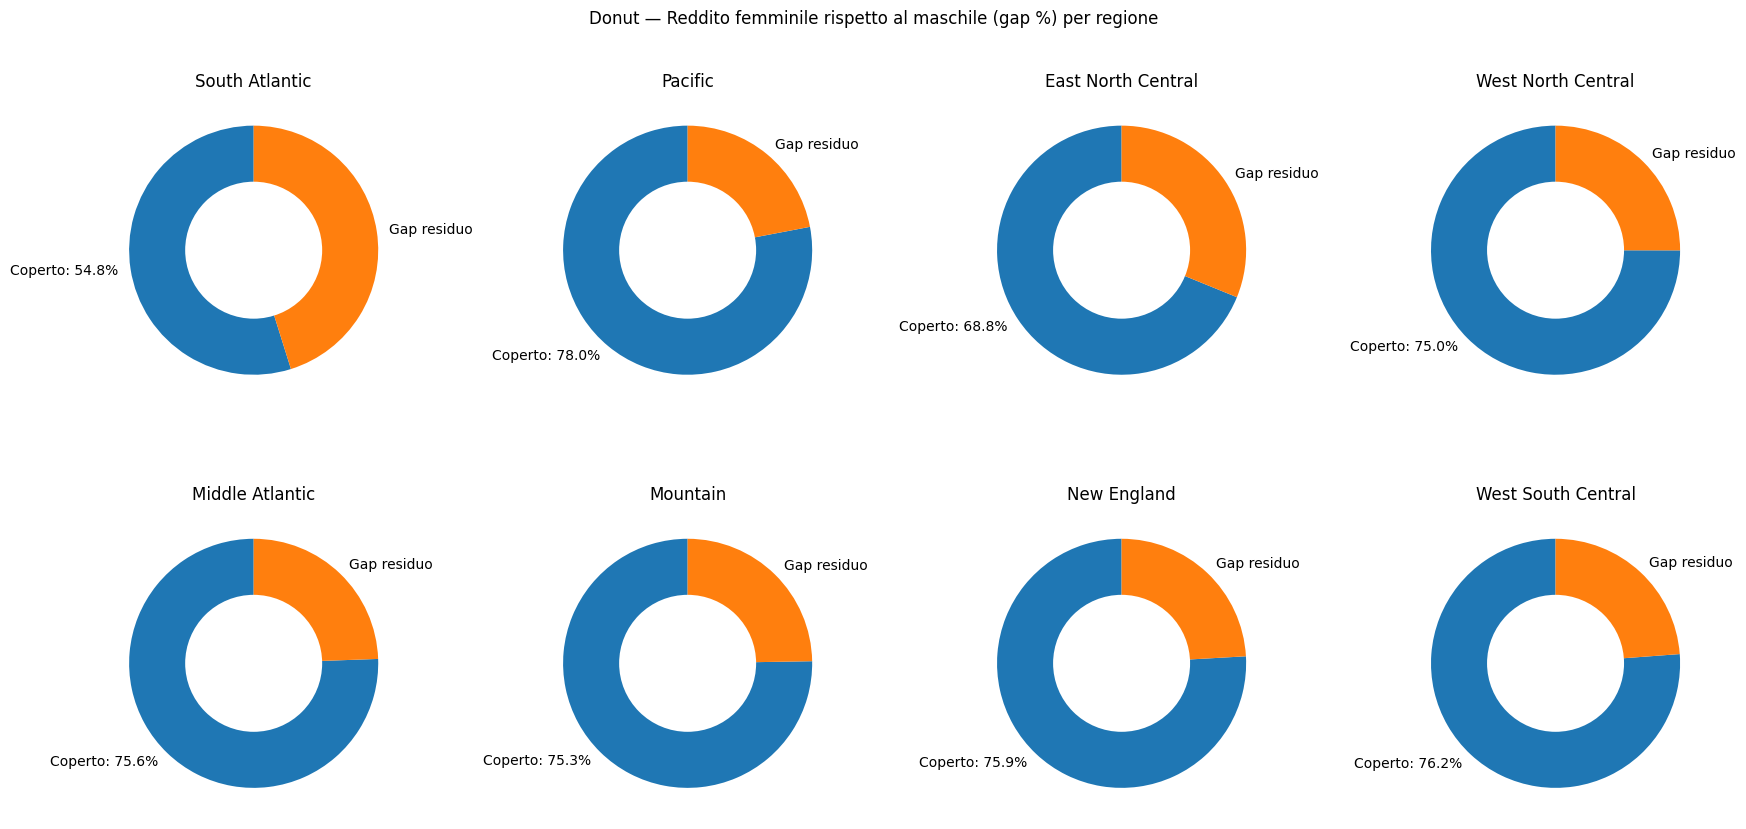

/var/folders/dz/pz9xbgy11sxfg_qph8_rm1s00000gn/T/ipykernel_65185/2447091897.py:150: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap()  # usa colormap di default


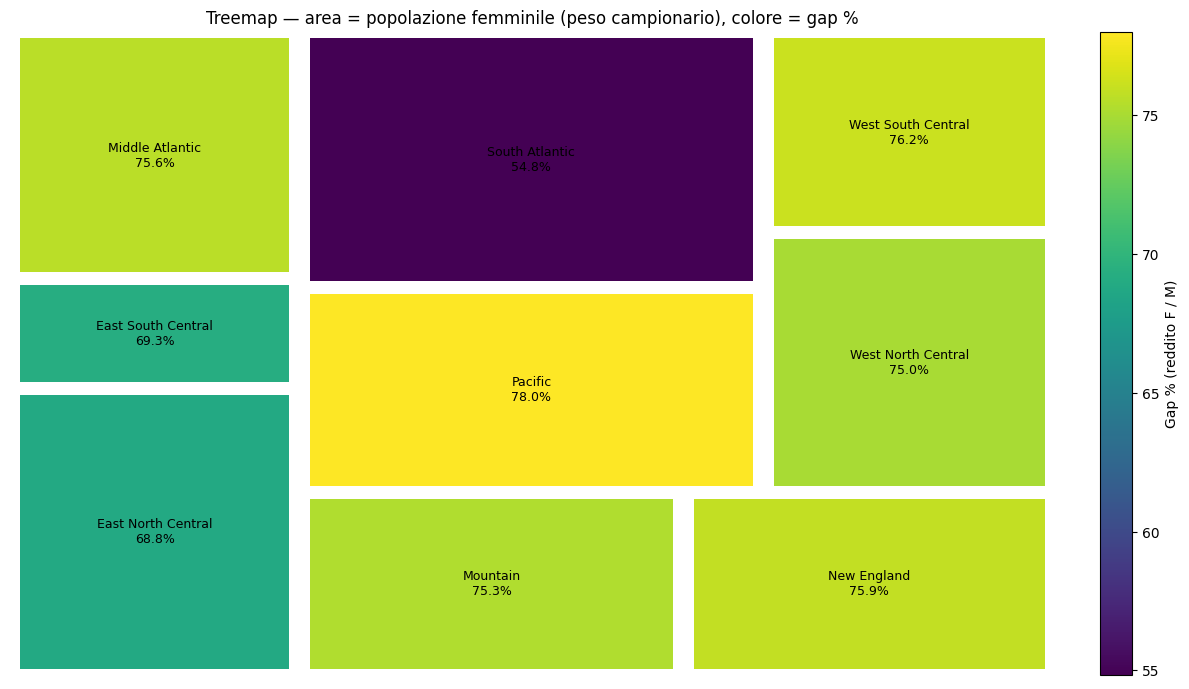

In [74]:
# -*- coding: utf-8 -*-
# CASE 1 — Gender pay gap per regione (CPS)
# Requisiti: pandas, matplotlib; opzionale: squarify (pip install squarify) per la treemap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prova a importare squarify; se non c'è, la treemap viene saltata con un messaggio
try:
    import squarify
    HAS_SQUARIFY = True
except Exception:
    HAS_SQUARIFY = False

CSV_PATH = "CurrentPopulationSurvey.csv"

# ===================== 1) CARICAMENTO & STANDARDIZZAZIONE =====================
df = pd.read_csv(CSV_PATH)

# Genere: preferisci 'female' (1=F,0=M); fallback 'sex'
if "female" in df.columns:
    gender = df["female"].map({1: "F", 0: "M"})
elif "sex" in df.columns:
    s = df["sex"].astype(str).str.lower().str.strip()
    gender = np.where(s.str.contains("f"), "F",
              np.where(s.str.contains("m"), "M", np.nan))
else:
    raise ValueError("Non trovo 'female' o 'sex' nel CSV.")

# Area: usa 'region' (codici Census a 2 cifre)
if "region" not in df.columns:
    raise ValueError("Non trovo 'region' nel CSV.")

# Reddito: annuo da lavoro (cambia qui se vuoi realhrwage)
INCOME_COL = "realhrwage"   # <-- metti "realhrwage" se preferisci salario orario reale
if INCOME_COL not in df.columns:
    raise ValueError(f"Colonna reddito '{INCOME_COL}' non trovata.")

income = pd.to_numeric(df[INCOME_COL], errors="coerce")
weight = pd.to_numeric(df["famwgt"], errors="coerce") if "famwgt" in df.columns else pd.Series(np.nan, index=df.index)

dat = pd.DataFrame({
    "gender": gender,
    "region": df["region"],
    "income": income,
    "weight": weight
}).dropna(subset=["gender","region","income"])

dat = dat[dat["gender"].isin(["M","F"])]

# Mappa codici regione -> etichette leggibili (schema Census)
REGION_LABELS = {
    11: "New England",
    12: "Middle Atlantic",
    21: "East North Central",
    22: "West North Central",
    31: "South Atlantic",
    32: "East South Central",
    33: "West South Central",
    41: "Mountain",
    42: "Pacific",
}
# Se i codici sono stringhe, prova a convertirli
try:
    dat["region"] = pd.to_numeric(dat["region"], errors="coerce").astype("Int64")
except Exception:
    pass

dat["region_name"] = dat["region"].map(REGION_LABELS).fillna(dat["region"].astype(str))

# ===================== 2) AGGREGAZIONE PER REGIONE × GENERE =====================
def wmean(x, w):
    x, w = np.asarray(x, float), np.asarray(w, float)
    m = np.isfinite(x) & np.isfinite(w)
    if m.sum() == 0:
        return np.nan
    if np.nansum(w[m]) <= 0:
        return np.nanmean(x[m])
    return np.nansum(x[m]*w[m]) / np.nansum(w[m])

rows = []
for (reg, gend), g in dat.groupby(["region_name","gender"], dropna=False):
    n = len(g)
    if g["weight"].notna().any():
        inc = wmean(g["income"], g["weight"].fillna(0))
        n_eff = np.nansum(g["weight"].values)
        if not np.isfinite(n_eff) or n_eff <= 0:
            n_eff = n
    else:
        inc = g["income"].mean()
        n_eff = n
    rows.append({"region": reg, "gender": gend,
                 "mean_income": inc, "n": n, "n_eff": n_eff})

agg = pd.DataFrame(rows)

pivot_inc  = agg.pivot(index="region", columns="gender", values="mean_income")
pivot_n    = agg.pivot(index="region", columns="gender", values="n").fillna(0)
pivot_neff = agg.pivot(index="region", columns="gender", values="n_eff").fillna(0)

# Tieni solo regioni con entrambi i generi presenti
res = pd.DataFrame({
    "mean_income_F": pivot_inc.get("F"),
    "mean_income_M": pivot_inc.get("M"),
    "n_F": pivot_n.get("F"),
    "n_M": pivot_n.get("M"),
    "n_eff_F": pivot_neff.get("F"),
    "n_eff_M": pivot_neff.get("M")
}).dropna(subset=["mean_income_F","mean_income_M"])

res["gap_pct"] = 100 * res["mean_income_F"] / res["mean_income_M"]
res["region"]  = res.index

# ===================== 3) GRAFICO A — DONUT MULTIPLI =====================
# Mostra le 8 regioni più "rappresentate" dal lato femminile
size_col = "n_eff_F" if res["n_eff_F"].notna().any() else "n_F"
subset = res.sort_values(size_col, ascending=False).head(8).copy()

rows, cols = (2, 4) if len(subset) > 4 else (1, len(subset))
fig, axes = plt.subplots(rows, cols, figsize=(4.4*cols, 4.4*rows))
axes = np.atleast_1d(axes).ravel()

for ax, (_, row) in zip(axes, subset.iterrows()):
    gap = float(row["gap_pct"])
    gap = max(0, min(100, gap))  # clamp 0-100
    vals = [gap, 100-gap]
    labels = [f"Coperto: {gap:.1f}%", "Gap residuo"]
    wedges, _ = ax.pie(vals, startangle=90, labels=labels)
    # foro centrale
    ax.add_artist(plt.Circle((0,0), 0.55, fc="white"))
    ax.set_title(row["region"])
for ax in axes[len(subset):]:
    ax.axis("off")

fig.suptitle("Donut — Reddito femminile rispetto al maschile (gap %) per regione", y=0.98)
plt.tight_layout()
plt.show()

# ===================== 4) GRAFICO B — TREEMAP =====================
if HAS_SQUARIFY:
    treemap_df = res.copy()
    # area = numerosità femminile (effettiva se disponibile), colore = gap %
    sizes = treemap_df[size_col].fillna(1).astype(float).values
    colors = treemap_df["gap_pct"].astype(float).values
    labels = [f"{r}\n{g:.1f}%" for r, g in zip(treemap_df["region"], treemap_df["gap_pct"])]

    plt.figure(figsize=(12, 7))
    norm = plt.Normalize(vmin=np.nanmin(colors), vmax=np.nanmax(colors))
    cmap = plt.cm.get_cmap()  # usa colormap di default
    squarify.plot(sizes=sizes, label=labels, color=cmap(norm(colors)), pad=True, text_kwargs={"fontsize":9})
    # Normalizzazione colori
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    # Crea un nuovo axis per la colorbar collegato alla figura corrente
    fig = plt.gcf()
    ax = plt.gca()
    cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
    cbar.set_label("Gap % (reddito F / M)")

    plt.title("Treemap — area = popolazione femminile (peso campionario), colore = gap %")
    plt.axis("off")
    plt.tight_layout()
    plt.show()
else:
    print("\n[INFO] 'squarify' non disponibile: installa con `pip install squarify` per generare la treemap.\n")